# importing libraries

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


# utility functions from scratch

In [ ]:
def euclidean_distance(x1, x2):
        return (np.sum((x1 - x2)**2))**0.5

def train_test_split(dataset):
    l=int(0.8*len(dataset))
    training_data = dataset[:l]  
    testing_data = dataset[l:]  
    return training_data,testing_data  

def accuracy(actaull_y,predicted_y):
    m=0
    for i in range(len(actaull_y)):
        if actaull_y[i] == predicted_y[i]:
                m+=1
    accuracy = m / len(predicted_y)
    return accuracy


def read_data(file_name):   #addressing by giving the file name
    df=pd.read_csv(file_name)
    xs=df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
    ys=df["target"]
    x =xs.values #data_frame to np.array 
    y=ys.values
    return x,y

# KNN model from scratch

In [ ]:
class KNN:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def comparing(self, x):
        distances,k_neighbor_labels=[],[]
        for i in self.X_train:
            distances.append(euclidean_distance(x, i))
        ks = np.argsort(distances)[:self.k] #indexes of first n nearest neighbours
        for i in ks:
            k_neighbor_labels.append(self.y_train[i])
        most_repeated = Counter(k_neighbor_labels).most_common(1)[0][0]
        return most_repeated
    
    def predict(self, X):
        predicted_y = np.array([self.comparing(x) for x in X])
        return predicted_y
    

# load data 

In [ ]:
X,y=read_data("heart.csv")

def shuffle(a, b):
    s = np.random.permutation(len(a))
    return a[s], b[s]
X,y=shuffle(X,y)

X_train, X_test = train_test_split(X)
y_train, y_test=train_test_split(y)



# train KNN

accuracy for k: 1 0.5573770491803278 1.0
accuracy for k: 2 0.5573770491803278 1.0
accuracy for k: 3 0.7049180327868853 0.8016528925619835
accuracy for k: 4 0.639344262295082 0.9049586776859504
accuracy for k: 5 0.6721311475409836 0.7644628099173554
accuracy for k: 6 0.6885245901639344 0.8388429752066116
accuracy for k: 7 0.7049180327868853 0.7272727272727273
accuracy for k: 8 0.6557377049180327 0.8057851239669421
accuracy for k: 9 0.6721311475409836 0.7024793388429752
accuracy for k: 10 0.639344262295082 0.768595041322314
accuracy for k: 11 0.6229508196721312 0.71900826446281
accuracy for k: 12 0.6229508196721312 0.756198347107438
accuracy for k: 13 0.6721311475409836 0.7024793388429752
accuracy for k: 14 0.6557377049180327 0.7520661157024794
14
best k is: 3


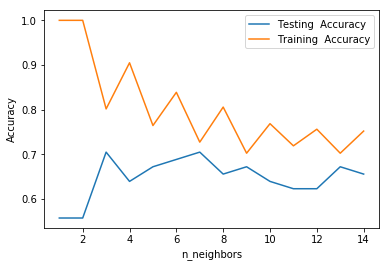

In [ ]:


l1,l2=[],[]
f=[i for i in range(1,15)]
Max=0
for k in range(1,15):
    clf = KNN(k)
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    predictionss = clf.predict(X_train)
    l1.append(accuracy(y_test, predictions))
    l2.append(accuracy(y_train, predictionss))
    if Max < accuracy(y_test, predictions):
        Max=accuracy(y_test, predictions)
        best_k=k
       
    print("accuracy for k:",k, accuracy(y_test, predictions), accuracy(y_train, predictionss)) 
print(k) 
print("best k is:",best_k)    
plt.plot(f,l1,label = 'Testing  Accuracy')
plt.plot(f,l2,label = 'Training  Accuracy')
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 


# five fold

In [ ]:
df=pd.read_csv("heart.csv")
def read_data(df):

    y1=[df.target[i] for i in range(len(df.age))]
    xs=df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
    X1 = xs.to_numpy().tolist()
    X = np.asarray(X1)
    y=np.asarray(y1)
    return X,y
X,y=read_data(df)
X,y=shuffle(X,y)
def k_fold_validation(x,y,k): #x an y must be shuffled

    l=int(len(X)/5)
    #print(len(X))
    m,n=0,0
    for i in range(1,6):
        if i==5:
            break
        x1=np.split(X, [i*l, (i+1)*l])#spliting array into 3 parts the middle part is 1/5 of data and beside it are therest
        y1=np.split(y, [i*l, (i+1)*l])
        training_x,testing_x=np.concatenate((x1[0], x1[2])),x1[1]
        training_y,testing_y=np.concatenate((y1[0], y1[2])),y1[1]
       # print(len(y1[1]))
        model=KNN(k=k)
        model.fit(training_x,training_y)
        predictions = model.predict(testing_x)
        predictionss = model.predict(training_x)
        m+=accuracy(testing_y, predictions)
        n+=accuracy(training_y, predictionss)
        #print(accuracy(testing_y, predictions),accuracy(training_y, predictionss))
    training_x,testing_x=[X[:4*l], X[4*l+3:]]#+3 is for the split size to be 60 like othe four test_splits
    training_y,testing_y=[y[:4*l], y[4*l+3:]]
    #print(len(testing_y))
    predictions = model.predict(testing_x)
    predictionss = model.predict(training_x)
    m+=accuracy(testing_y, predictions)
    n+=accuracy(training_y, predictionss)
   # print("mean test accuracy is:",m/5,"and mean training accuracy is:",n/5)
    return m/5 #mean of the 5 time spliting of data
#testing cross validation for different ks
Max=0
for k in range(1,16):
   # print("accuracy is:",k_fold_validation(X,y,k),"for k:",k)
    acc=k_fold_validation(X,y,k)
    if acc>Max:
        Max=acc
        best_k=k
print("best k_parameter with 5 fold cross validation is:",best_k,"and mean acc:",Max)        
    

best k_parameter with 5 fold cross validation is: 14 and mean acc: 0.67


# Evaluation

In [ ]:

clf=KNN(k=best_k)
clf.fit(X_train,y_train)
def confusion_matrix(y_test, y_pred):
    TN,TP,FN,FP=0,0,0,0
    for i in range(len(y_test)):
        if y_test[i]==0 and clf.predict(X_test)[i]==0:
            TN+=1
        elif y_test[i]==1 and clf.predict(X_test)[i]==1:
            TP+=1
        elif y_test[i]==1 and clf.predict(X_test)[i]==0:
            FN+=1   
        else:
            FP+=1
            
    return TN,TP,FN,FP   
print("confusion_matrix knn")
print("TN,TP,FN,FP are:")
print(confusion_matrix(y_test, clf.predict(X_test)))
print("")

def classification_report(y_test, y_pred):#accuracy, precision, recall, specificity, f1Score
    TN,TP,FN,FP =confusion_matrix(y_test, y_pred)
    totall=TN+TP+FN+FP
    specificity=TN/(TN+FP)#True Negative)/(True Negative + False Positive
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    accuracy=(TP+TN)/totall
    f1score=(2*precision*recall)/(precision+recall)
    return accuracy, precision, recall, specificity, f1score
print("classification report knn")
print("accuracy, precision, recall, specificity, f1Score are:")
print(classification_report(y_test, clf.predict(X_test)))
KNN_pred=clf.predict(X_test)

confusion_matrix knn
TN,TP,FN,FP are:
(14, 26, 9, 12)

classification report knn
accuracy, precision, recall, specificity, f1Score are:
(0.6557377049180327, 0.6842105263157895, 0.7428571428571429, 0.5384615384615384, 0.7123287671232877)


# Decision tree

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
class tree_node:
    def __init__(self, feature=None, spliting_value=None, left=None, right=None, value=None):
        self.feature = feature
        self.spliting_value = spliting_value
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None
def entropy(labels):
    probs = np.bincount(labels) / len(labels)
   # print(probs)
    c=0
    for prob in probs:
        if prob>0:
            c+=-1*(prob * np.log2(prob))
    return c

def accuracy(actaull_y,predicted_y):
    m=0
    for i in range(len(actaull_y)):
        if actaull_y[i] == predicted_y[i]:
                m+=1
    accuracy = m / len(predicted_y)
    return accuracy


class DecisionTree:

    def __init__(self, max_depth=k,root=None,x_features=None,thresh=0.8):
        self.max_depth = max_depth
        self.x_features = x_features
        self.root = None
        self.thresh = thresh

    def fit(self, X, y):
        self.x_features = len(X[0]) if not self.x_features else min(self.x_features,len(X[0]))
        self.root = self.build_tree(X, y)


    def build_tree(self, X, y, depth=0):
        
        if (depth >= self.max_depth  or Counter(y).most_common(1)[0][1]/len(y)>= self.thresh ):
            leaf_value = Counter(y).most_common(1)[0][0]
            return tree_node(value=leaf_value)

        feat_idxs = np.random.choice(len(X[0]), self.x_features, replace=False)
        best_feat, best_value = self.final_split(X, y, feat_idxs)        

        left_node, right_node = self.parent_split(X[:, best_feat], best_value)
        left = self.build_tree(X[left_node, :], y[left_node], depth+1)
        right = self.build_tree(X[right_node, :], y[right_node], depth+1)
        return tree_node(best_feat, best_value, left, right)

    def final_split(self, X, y, features):
        max_gain = -99
        for i in features:
            X_sub = X[:, i] #each feature and its whole data as input to infogain
            spliting_values = np.unique(X_sub)
            for spliting_value in spliting_values:
                infogain = self.info_gain(y, X_sub, spliting_value)

                if infogain > max_gain:
                    max_gain = infogain
                    where_to_split = i
                    split_boundry = spliting_value
        return where_to_split, split_boundry

    def info_gain(self, y, x, split_value):
        parent_node_entropy = entropy(y)
        left_node, right_node = self.parent_split(x, split_value)
        left_node_entropy = (len(left_node) /len(y)) *entropy(y[left_node])
        right_node_entropy =(len(right_node) / len(y)) * entropy(y[right_node])
        info_gain = parent_node_entropy - right_node_entropy - left_node_entropy
        return info_gain

    def parent_split(self,x, split_boundry): #split a node to left and right like gini index
        left_node,right_node=[],[]
        for i in range(len(x)):
            if x[i] <= split_boundry:
                left_node.append(i)
            else:
                right_node.append(i)
        return left_node,right_node

    def tree_spliting(self, x, node):
        if node.is_leaf_node():
            return node.value
        elif x[node.feature] <= node.spliting_value:
            return self.tree_spliting(x, node.left)
        else:   
            return self.tree_spliting(x, node.right)

    def predict(self, X):
        l=[]
        for i in X:
            l.append(self.tree_spliting(i, self.root))
        return np.array(l)
  
  

# load data

In [ ]:
def read_data(file_name):   #addressing by giving the file name
    df=pd.read_csv(file_name)
    xs=df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
    ys=df["target"]
    x =xs.values #data_frame to np.array 
    y=ys.values
    return x,y
X,y=read_data("heart.csv")

def train_test_split(dataset):
    l=int(0.8*len(dataset))
    training_data = dataset[:l]
    testing_data = dataset[l:]  
    return training_data,testing_data 
  
def shuffle(x, y): #x,y both np arrays
    s = np.random.permutation(len(x))
    return x[s], y[s]
X,y=shuffle(X,y)

X_train, X_test = train_test_split(X)
y_train, y_test=train_test_split(y)  


# Train decision tree

accuracy for max_depth: 1 0.6885245901639344 0.7768595041322314
accuracy for max_depth: 2 0.6885245901639344 0.7768595041322314
accuracy for max_depth: 3 0.819672131147541 0.8429752066115702
accuracy for max_depth: 4 0.819672131147541 0.8677685950413223
accuracy for max_depth: 5 0.7868852459016393 0.8842975206611571
accuracy for max_depth: 6 0.819672131147541 0.8925619834710744
accuracy for max_depth: 7 0.8032786885245902 0.9008264462809917
accuracy for max_depth: 8 0.7868852459016393 0.8966942148760331
accuracy for max_depth: 9 0.7868852459016393 0.9008264462809917
accuracy for max_depth: 10 0.819672131147541 0.9132231404958677
accuracy for max_depth: 11 0.819672131147541 0.9090909090909091
accuracy for max_depth: 12 0.8688524590163934 0.9132231404958677
accuracy for max_depth: 13 0.7868852459016393 0.9008264462809917
accuracy for max_depth: 14 0.8524590163934426 0.9132231404958677
best max_depth is: 12


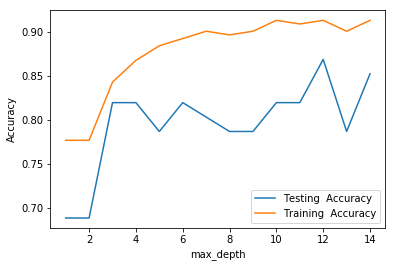

In [ ]:

l1,l2=[],[]
f=[i for i in range(1,15)]
Max=0
for max_depth in range(1,15):
    clf = DecisionTree(max_depth)
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    predictionss = clf.predict(X_train)
    l1.append(accuracy(y_test, predictions))
    l2.append(accuracy(y_train, predictionss))
    if Max < accuracy(y_test, predictions):
        Max=accuracy(y_test, predictions)
        best_depth=max_depth
       
    print("accuracy for max_depth:",max_depth, accuracy(y_test, predictions), accuracy(y_train, predictionss))  
print("best max_depth is:",best_depth)    
plt.plot(f,l1,label = 'Testing  Accuracy')
plt.plot(f,l2,label = 'Training  Accuracy')
plt.legend() 
plt.xlabel('max_depth') 
plt.ylabel('Accuracy') 
plt.show()


# five fold validation

In [ ]:
def k_fold_validation(x,y,max_depth): #x an y must be shuffled

    l=int(len(X)/5)
    #print(len(X))
    m,n=0,0
    for i in range(1,6):
        if i==5:
            break
        x1=np.split(X, [i*l, (i+1)*l])#spliting array into 3 parts the middle part is 1/5 of data and beside it are therest
        y1=np.split(y, [i*l, (i+1)*l])
        training_x,testing_x=np.concatenate((x1[0], x1[2])),x1[1]
        training_y,testing_y=np.concatenate((y1[0], y1[2])),y1[1]
       # print(len(y1[1]))
        model=DecisionTree(max_depth)
        model.fit(training_x,training_y)
        predictions = model.predict(testing_x)
        predictionss = model.predict(training_x)
        m+=accuracy(testing_y, predictions)
        n+=accuracy(training_y, predictionss)
        #print(accuracy(testing_y, predictions),accuracy(training_y, predictionss))
    training_x,testing_x=[X[:4*l], X[4*l+3:]]
    training_y,testing_y=[y[:4*l], y[4*l+3:]]
    #print(len(testing_y))
    predictions = model.predict(testing_x)
    predictionss = model.predict(training_x)
    m+=accuracy(testing_y, predictions)
    n+=accuracy(training_y, predictionss)
   # print("mean test accuracy is:",m/5,"and mean training accuracy is:",n/5)
    return m/5
#testing cross validation for different max_depths
Max_acc=0
for max_depth in range(1,14):
   # print("accuracy is:",k_fold_validation(X,y,k),"for k:",k)
    acc=k_fold_validation(X,y,k)
    if acc>Max_acc:
        Max_acc=acc
        best_max_depth=max_depth
print("best max_depth_parameter is:",best_max_depth,"mean acc is:",Max_acc)

best max_depth_parameter is: 7 mean acc is: 0.8266666666666665


# Evaluation

In [ ]:
clf=DecisionTree(best_max_depth)
clf.fit(X_train,y_train)
 
print("confusion_matrix for desicion tree")
print("TN,TP,FN,FP are:")
print(confusion_matrix(y_test, clf.predict(X_test)))
print("")


print("classification report for descison")
print("accuracy, precision, recall, specificity, f1Score are:")
print(classification_report(y_test, clf.predict(X_test)))
decision_pred=clf.predict(X_test)


confusion_matrix for desicion tree
TN,TP,FN,FP are:
(16, 34, 6, 5)

classification report for descison
accuracy, precision, recall, specificity, f1Score are:
(0.819672131147541, 0.8717948717948718, 0.85, 0.7619047619047619, 0.8607594936708861)


#t_test 
**has knn or decision tree has better performance??**

## null hypothesis:two models are the same

In [ ]:
knn_error,tree_error=[0 for i in range(len(y_test))],[0 for i in range(len(y_test))]
for i in range(len(y_test)):
    if y_test[i]!=decision_pred[i]:
        tree_error[i]=1
    if y_test[i]!=KNN_pred[i]:
        knn_error[i]=1

mu_a,mu_b= np.mean(knn_error),np.mean(tree_error)
d_bar = mu_a-mu_b

a_hat=[knn_error[i]-mu_a  for i in range(len(y_test))]
b_hat=[tree_error[i]-mu_b  for i in range(len(y_test))]
diff=[(a_hat[i]-b_hat[i])**2  for i in range(len(y_test))]

n = len(y_test)
t_static =  d_bar * np.sqrt((n*n-1)/np.sum(diff))
print("t : ",t_static)
if abs(t_static)<=1.96:# under the 97.5% signifance
    print("fail to reject the null hypothesis")# two models are the same
    print("two models are the same")
else:
    print("reject the null hypothesis!")# two models are different
    print("two models arent the same")

t :  4.348942475949504
reject the null hypothesis!
two models arent the same


In [ ]:
from scipy import stats
stats.ttest_rel(knn_error,tree_error)

Ttest_relResult(statistic=4.313727787271749, pvalue=6.0835493767771193e-05)